## Real State Analysis using Python ##

### About the Dataset
The Dataset consist details of flats in different-different cities at different-different locations. I got the Data by webscrapping the website i.e no-brokrage.

### Objective of the Data Analysis
1)Comparision between all the cities according to Price  
2)Costliest flat  
3)per sqft rate of flat

#### Step-1 Importing Necessary Python Libraries

In [1]:
import pandas as pd #Data processing and Data Cleaning
import numpy as np #For mathematical calculation and creating array
import matplotlib.pyplot as plt #For data visualization
import seaborn as sns #For data visualization
import plotly.express as px

#### Step-2 Loading Dataset

In [2]:
df=pd.read_excel("C:/Users/HITH THAPA/Hith_py/Assignment/webscrapping/MergedDataAnalysis.xlsx")#Loading Dataset

In [3]:
df#Dataset

,S.no,City,Location,BHK Type,Flat,Price(Crores),EMI per month(Thousand),Area(sqft)
0,1,Bangalore,koramangala_bangalore,3 BHK,"3 BHK Flat In Gangotri Grandeur, For Sale In...",2.50,143000.0,2084
1,2,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Dsr Orchids Apartment For Sale ...,0.95,54448.0,1462
2,3,Bangalore,koramangala_bangalore,4 BHK,4 BHK Flat In Codename Venkatapura For Sale ...,4.00,229000.0,3200
3,4,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Codename Venkatapura For Sale ...,3.35,192000.0,2627
4,5,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Aishwarya Apartments - 1 For ...,1.50,85971.0,1400
...,...,...,...,...,...,...,...,...
863,864,Mumbai,bandra_mumbai,1 RK F,1 RK Flat In Nutan Nagar Society For Sale In...,0.90,51583.0,310
864,865,Mumbai,bandra_mumbai,1 BHK,1 BHK Flat In Labbaik House For Sale In Band...,1.35,77374.0,450
865,866,Mumbai,bandra_mumbai,2 BHK,2 BHK Apartment In Sayba Residency For Sale ...,2.31,132000.0,700
866,867,Mumbai,bandra_mumbai,3 BHK,3 BHK Flat In Sambhav Zest For Sale In Bandr...,6.00,344000.0,925


#### Step-3 Finding Missing Value or Null Values

In [4]:
df.isnull().sum() #To get null value in any column

S.no                       0
City                       0
Location                   0
BHK Type                   0
Flat                       0
Price(Crores)              0
EMI per month(Thousand)    0
Area(sqft)                 0
dtype: int64

* There is no null value in our Dataset

In [5]:
df1=df.copy()#Making copy of orignal Dataset so that in case we want to check out some old data we can refer the orignal Dataset

In [6]:
df1.drop('S.no',axis=1,inplace=True)

* As the S.no column is no of our use so we can drop the whole column

In [7]:
df1.describe()#To get the statistical data of our Data set 

,Price(Crores),EMI per month(Thousand),Area(sqft)
count,868.000000,868.000000,868.000000
mean,1.519439,87084.918203,1222.526498
std,1.516825,86939.259855,775.720342
min,0.060000,3438.000000,198.000000
25%,0.670000,38400.000000,791.750000
50%,0.991800,56844.000000,1068.500000
75%,1.752500,100250.000000,1440.000000
max,13.000000,745000.000000,9000.000000


* As we can see from the above data that the maximum Price of Flat is 13 Crores and Minimum Price of Flat is 6 Lakh among all the cities present in our dataset.
* We can also see that 25% of rates are equals to or below 67 Lacs, 50% of rates are equals to or below 99 Lacs and 75% of rates are equals to or below 1.75 Crore.
* Maximum area available is 9000 sqft and minimum area available is 198 sqft.



In [8]:
df1.info() # By this we can check the datatype of our data set and as well as we can check for Null values also.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     868 non-null    object 
 1   Location                 868 non-null    object 
 2   BHK Type                 868 non-null    object 
 3   Flat                     868 non-null    object 
 4   Price(Crores)            868 non-null    float64
 5   EMI per month(Thousand)  868 non-null    float64
 6   Area(sqft)               868 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 47.6+ KB


In [30]:
40000000/3200


12500.0

* We can see that the datatype of columns(City, BHK Type, Location) is Object which dosn't need any conversion

In [9]:
df1

,City,Location,BHK Type,Flat,Price(Crores),EMI per month(Thousand),Area(sqft)
0,Bangalore,koramangala_bangalore,3 BHK,"3 BHK Flat In Gangotri Grandeur, For Sale In...",2.50,143000.0,2084
1,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Dsr Orchids Apartment For Sale ...,0.95,54448.0,1462
2,Bangalore,koramangala_bangalore,4 BHK,4 BHK Flat In Codename Venkatapura For Sale ...,4.00,229000.0,3200
3,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Codename Venkatapura For Sale ...,3.35,192000.0,2627
4,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Aishwarya Apartments - 1 For ...,1.50,85971.0,1400
...,...,...,...,...,...,...,...
863,Mumbai,bandra_mumbai,1 RK F,1 RK Flat In Nutan Nagar Society For Sale In...,0.90,51583.0,310
864,Mumbai,bandra_mumbai,1 BHK,1 BHK Flat In Labbaik House For Sale In Band...,1.35,77374.0,450
865,Mumbai,bandra_mumbai,2 BHK,2 BHK Apartment In Sayba Residency For Sale ...,2.31,132000.0,700
866,Mumbai,bandra_mumbai,3 BHK,3 BHK Flat In Sambhav Zest For Sale In Bandr...,6.00,344000.0,925


#### Step-4 Data Prepration for analysis

* Adding one more column for per sqft rate

In [10]:
df1['Rate per sqft(Thousand)']=(df1['Price(Crores)']/df1['Area(sqft)'])*10000000

In [11]:
df1.head()

,City,Location,BHK Type,Flat,Price(Crores),EMI per month(Thousand),Area(sqft),Rate per sqft(Thousand)
0,Bangalore,koramangala_bangalore,3 BHK,"3 BHK Flat In Gangotri Grandeur, For Sale In...",2.50,143000.0,2084,11996.161228
1,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Dsr Orchids Apartment For Sale ...,0.95,54448.0,1462,6497.948016
2,Bangalore,koramangala_bangalore,4 BHK,4 BHK Flat In Codename Venkatapura For Sale ...,4.00,229000.0,3200,12500.000000
3,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Codename Venkatapura For Sale ...,3.35,192000.0,2627,12752.188809
4,Bangalore,koramangala_bangalore,3 BHK,3 BHK Flat In Aishwarya Apartments - 1 For ...,1.50,85971.0,1400,10714.285714


# Data Analysis

### Que-1) Comparision between all the cities according to price

Text(0, 0.5, 'Crores')

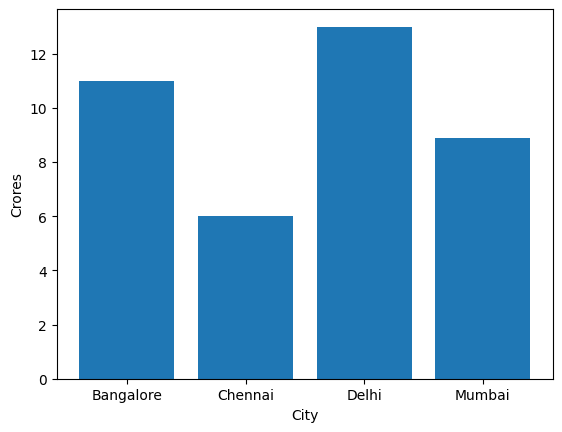

In [12]:
plt.bar(df1['City'],df1['Price(Crores)'])
plt.xlabel('City')
plt.ylabel('Crores')

### Conclusion no. 1:-
* with the help of above bar graph we can see that Delhi is the city in which the rates of Flat is Maximum and Chennai is the city with minimum rates among all 

### Que 2) Which city contain what type of Flat 

Text(0, 0.5, 'Flat')

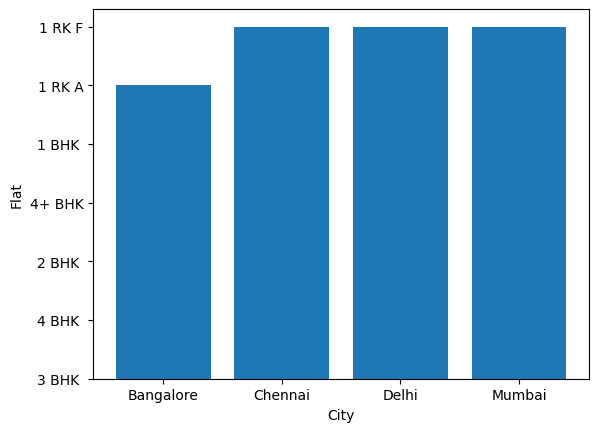

In [13]:
plt.bar(df1['City'],df1['BHK Type'])
plt.xlabel('City')
plt.ylabel('Flat')

### Conclusion no. 2:-
* We can see that Bangalore is the only city which does not have 1 RK(Room, Kitchen) Flat for sell. So, one should not search 1RK in Bangalore

### Que-3) Which city is having highest and lowest Rate per sqft?

<BarContainer object of 868 artists>

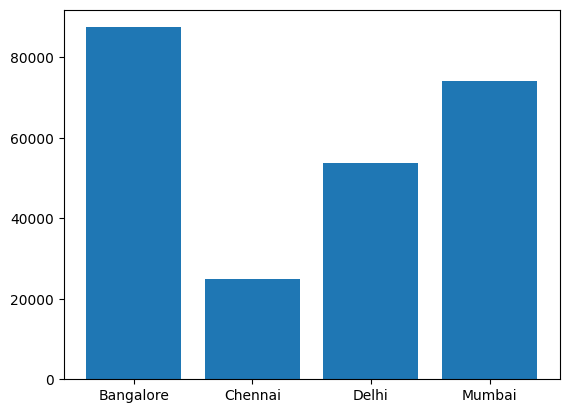

In [14]:
plt.bar(df1['City'],df1['Rate per sqft(Thousand)'])

### Conclusion no. 3:-   
* Bangalore is the city with maximum Rate per sqft and Chennai is the city with lowest Rate per sqft

### Que-4) Which Location contains the costilest as well as economical Flat in each city?

In [15]:
df1.columns

Index(['City', 'Location', 'BHK Type', 'Flat', 'Price(Crores)',
       'EMI per month(Thousand)', 'Area(sqft)', 'Rate per sqft(Thousand)'],
      dtype='object')

In [16]:
dfB=df1[df1['City']=='Bangalore']

In [17]:
dfC=df1[df1['City']=='Chennai']


In [18]:
dfD=df1[df1['City']=='Delhi']

In [19]:
dfM=df1[df1['City']=='Mumbai']

* Creating a seperate Dataframe for different City according to Location, Price and Area.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'andheri_west_mumbai'),
  Text(1, 0, 'andheri_east_mumbai'),
  Text(2, 0, 'malad_west_mumbai'),
  Text(3, 0, 'navi_mumbai_mumbai'),
  Text(4, 0, 'powai_mumbai'),
  Text(5, 0, 'thane_west_mumbai'),
  Text(6, 0, 'mira_road_east_mumbai'),
  Text(7, 0, 'kharghar_mumbai'),
  Text(8, 0, 'kandivali_east_mumbai'),
  Text(9, 0, 'bandra_mumbai')])

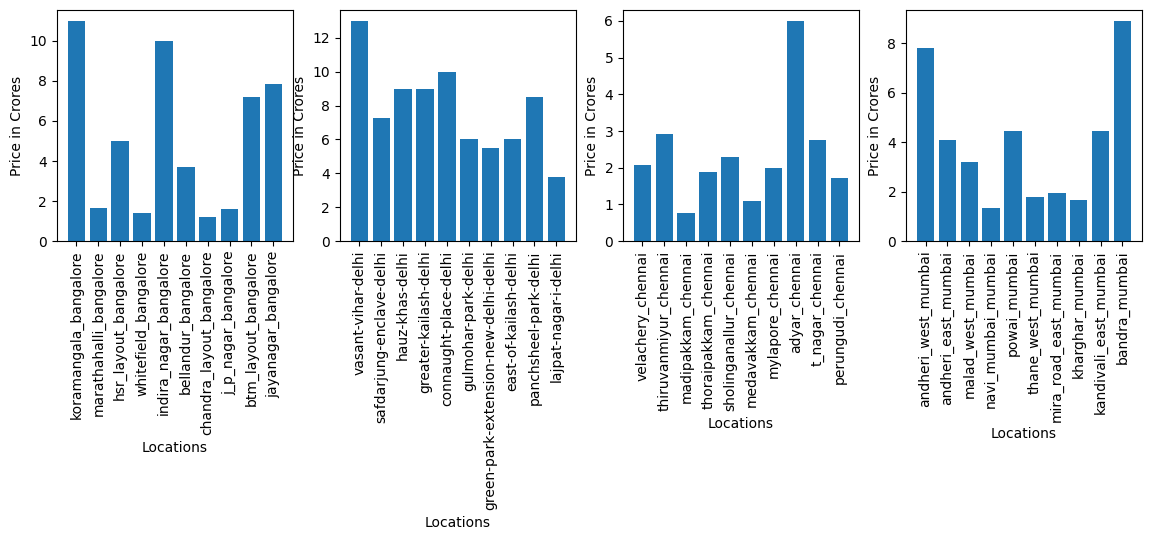

In [20]:
plt.figure(figsize=(14,3))
plt.subplot(1,4,1)
plt.bar(dfB['Location'],dfB['Price(Crores)'])
plt.xlabel('Locations')
plt.ylabel('Price in Crores')
plt.xticks(rotation=90)
plt.subplot(1,4,2)
plt.bar(dfD['Location'],dfD['Price(Crores)'])
plt.xlabel('Locations')
plt.ylabel('Price in Crores')
plt.xticks(rotation=90)
plt.subplot(1,4,3)
plt.bar(dfC['Location'],dfC['Price(Crores)'])
plt.xlabel('Locations')
plt.ylabel('Price in Crores')
plt.xticks(rotation=90)
plt.subplot(1,4,4)
plt.bar(dfM['Location'],dfM['Price(Crores)'])
plt.xlabel('Locations')
plt.ylabel('Price in Crores')
plt.xticks(rotation=90)

### Conclusion no. 4:-
* Koramangala is the costiliest and Chandra Layout is the cheapest location to get flat in Bangalore. 
* Vasant-vihar is the costiliest and Lajpat Nagar is the cheapest location to get flat in Delhi.
* Adyar is the costiliest and Madipallam is the cheapest location to get flat in Chennai.
* Bandra is the costiliest and Navi Mumbai is the cheapest location to get flat in Mumbai. 
#### Among all the Location in all city Vasant-vihar is the costiliest one i.e in Delhi and Madipallam is the cheapest one i.e in Chennai



### Que 5) Which type of Flat is the costilest in Delhi and Cheapest in Chennai ?

In [21]:
dfDL=dfD[dfD['Location']=='vasant-vihar-delhi']
dfCL=dfC[dfC['Location']=='madipakkam_chennai']

In [22]:
max(dfDL['Price(Crores)'])

13.0

In [23]:
dfDL[dfDL['Price(Crores)']==13]

,City,Location,BHK Type,Flat,Price(Crores),EMI per month(Thousand),Area(sqft),Rate per sqft(Thousand)
492,Delhi,vasant-vihar-delhi,4 BHK,4 BHK Flat In Apartment For Sale In Vasant V...,13.0,745000.0,4950,26262.626263


In [24]:
min(dfCL['Price(Crores)'])

0.38

In [25]:
dfCL[dfCL['Price(Crores)']==0.38]

,City,Location,BHK Type,Flat,Price(Crores),EMI per month(Thousand),Area(sqft),Rate per sqft(Thousand)
289,Chennai,madipakkam_chennai,2 BHK,2 BHK Flat In Ram Villa Apartment For Sale I...,0.38,21779.0,787,4828.462516


([0, 1], [Text(0, 0, '2 BHK '), Text(1, 0, '3 BHK ')])

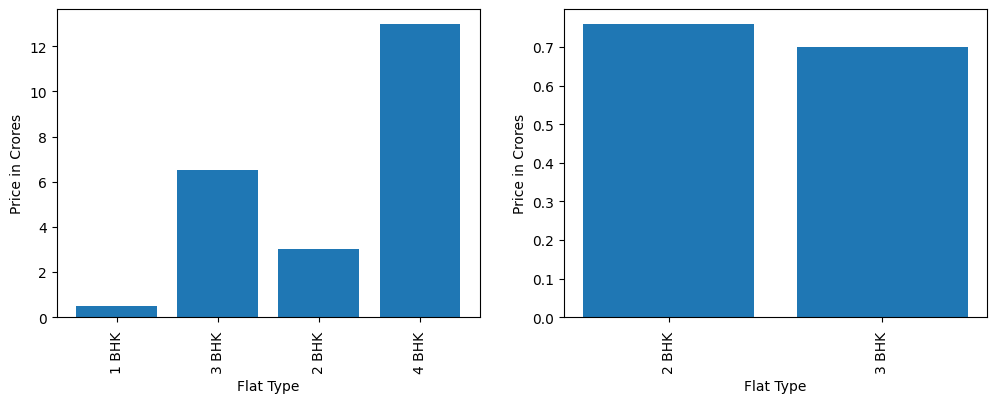

In [26]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(dfDL['BHK Type'],dfDL['Price(Crores)'])
plt.xlabel('Flat Type')
plt.ylabel('Price in Crores')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.bar(dfCL['BHK Type'],dfCL['Price(Crores)'])
plt.xlabel('Flat Type')
plt.ylabel('Price in Crores')
plt.xticks(rotation=90)


### Conclusion no. 5:-
* From above Data we get to know that in Delhi the 4BHK Flat is the most expensive one i.e is in Vasant-vihar and 2BHK Flat is the cheapest one i.e is in madipakkam in chennai


### Que-6) find the Inter-relation between price and area in different cities?


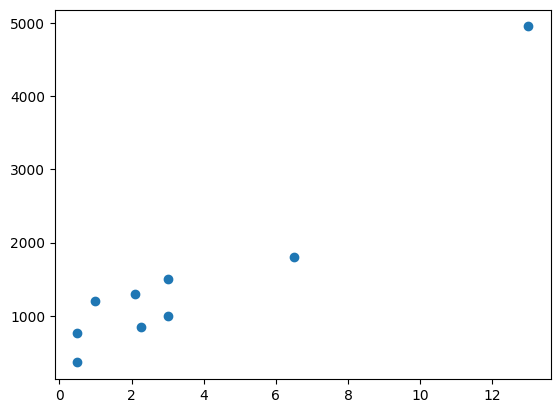

In [27]:
plt.scatter(dfDL['Price(Crores)'],dfDL['Area(sqft)'])